In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import random
import pickle
import sys
import json

from collections import Counter 
from scipy import stats
sys.path.append("../../src/visualization")
import esi_compare_viz
import esi_evaluation
sys.path.append("../../src/models/predict_model")
import predict_esi_rss

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_rows', None)
pd.options.display.max_columns = None

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

## Read Data

In [7]:
with open('../../fileConfig.json') as config_file:    
        fileConfig = json.load(config_file)
fileESIThreshold_location = fileConfig['dataDirectory'] + fileConfig['resultDirectory'] + 'esi_thresholds.json'  
with open(fileESIThreshold_location) as config_file:    
        thresholds = json.load(config_file)
thresholds

{u'esi1_threshold': 0.8849242925643921,
 u'esi2_threshold': 0.7484203577041626,
 u'rss_threshold': 0.35}

In [3]:
df = json.load(open('../../data/result/Predictions_2010.json'))

#Keys are co_pred, rss_pred, ESI, rss, co_bin, co_type

In [4]:
ESI = df['ESI']
co_pred = df['co_pred']
rss_pred = df['rss_pred']
rss = df['rss']
co_bin = df['co_bin']
co_type = df['co_type']

In [8]:
rss_threshold= thresholds['rss_threshold']
rss_max = [np.argmax(r) for r in rss_pred]
rss_comp = np.column_stack((rss_max,rss_pred))
rss_p = [predict_esi_rss.predict_rss(rmax,r0,r1,r2,rss_threshold) for rmax,r0,r1,r2 in rss_comp]

In [11]:
ESI1 =thresholds['esi1_threshold']
ESI2 = thresholds['esi2_threshold']
new_esi = esi_evaluation.get_new_esi(rss_pred,co_pred,rss_threshold,ESI1, ESI2)
print('New ESI:', Counter(new_esi))

('New ESI:', Counter({3: 12543, 5: 6527, 4: 2777, 2: 1810, 1: 538}))


In [12]:
data_tuples = list(zip(ESI, co_pred, rss_pred, co_bin, co_type, new_esi))
cdc_info = pd.DataFrame(data_tuples, columns=['ESI', 'co_pred','rss_pred','co_bin','co_type','new_esi'])

In [13]:
# Python code to count the number of occurrences
old_esi_counts, new_esi_counts = get_esi_counts(ESI, new_esi)

## RLH New Sankey Plot

In [13]:
#Create better labels for old and new ESI
esi_co_flag=[]

for i in range(len(ESI)):
    if ESI[i]==5 and co_bin[i]==1:
        esi_co_flag.append('ESI 5 CO')
    elif ESI[i]==5 and co_bin[i]==0:
        esi_co_flag.append('ESI 5 Non-CO')
    elif ESI[i]==4 and co_bin[i]==1:
        esi_co_flag.append('ESI 4 CO')
    elif ESI[i]==4 and co_bin[i]==0:
        esi_co_flag.append('ESI 4 Non-CO')
    elif ESI[i]==3 and co_bin[i]==1:
        esi_co_flag.append('ESI 3 CO')
    elif ESI[i]==3 and co_bin[i]==0:
        esi_co_flag.append('ESI 3 Non-CO')
    elif ESI[i]==2 and co_bin[i]==1:
        esi_co_flag.append('ESI 2 CO')
    elif ESI[i]==2 and co_bin[i]==0:
        esi_co_flag.append('ESI 2 Non-CO')
    elif ESI[i]==1 and co_bin[i]==1:
        esi_co_flag.append('ESI 1 CO')
    else:
        esi_co_flag.append('ESI 1 Non-CO')
    
print(ESI[27])
print(co_bin[27])
print(esi_co_flag[27])





new_esi_string=[]

for i in range(len(new_esi)):
    if new_esi[i]==5:
        new_esi_string.append('IDANN ESI 5')
    elif new_esi[i]==4:
        new_esi_string.append('IDANN ESI 4')
    elif new_esi[i]==3:
        new_esi_string.append('IDANN ESI 3')
    elif new_esi[i]==2:
        new_esi_string.append('IDANN ESI 2')
    else:
        new_esi_string.append('IDANN ESI 1')
    
print(new_esi[132])
print(new_esi_string[132])

3
0
ESI 3 Non-CO
4
IDANN ESI 4


Previous ESI to New ESI
{'ESI 1 CO': 88, 'ESI 2 CO': 378, 'ESI 3 CO': 642, 'ESI 4 CO': 90, 'ESI 2 Non-CO': 2317, 'ESI 5 Non-CO': 1803, 'ESI 1 Non-CO': 257, 'ESI 3 Non-CO': 10790, 'ESI 5 CO': 47, 'ESI 4 Non-CO': 7783}
{'IDANN ESI 4': 2777, 'IDANN ESI 5': 6527, 'IDANN ESI 2': 1810, 'IDANN ESI 3': 12543, 'IDANN ESI 1': 538}


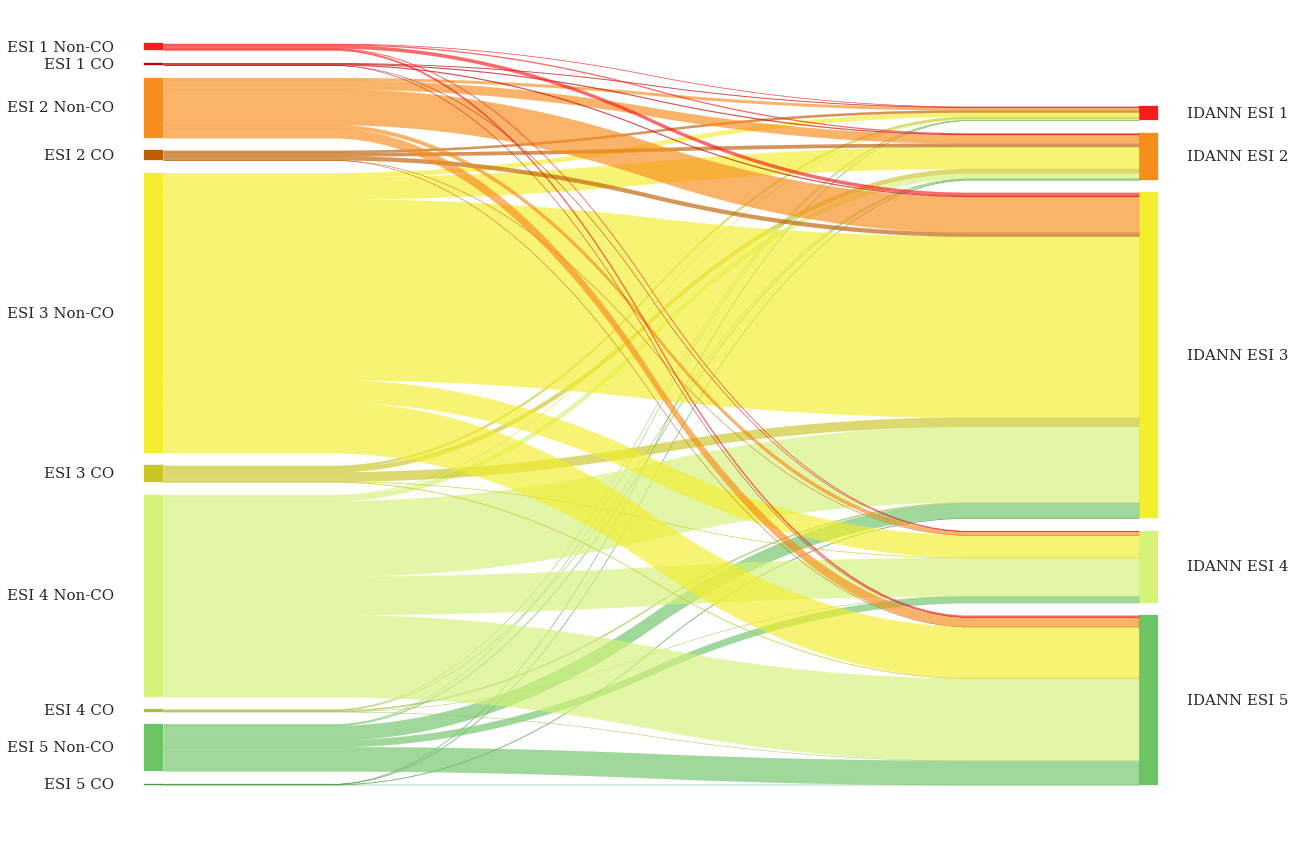

In [14]:
import sankey
import matplotlib.pyplot as plt
%matplotlib inline

colorDict =  {'ESI 1 CO':'#bb0000',
              'ESI 1 Non-CO':'#f71b1b',
              'IDANN ESI 1':'#f71b1b',
              'ESI 2 CO':'#be5e00',
              'ESI 2 Non-CO':'#f78c1b',
              'IDANN ESI 2':'#f78c1b',
              'ESI 3 CO':'#c9c523',
              'ESI 3 Non-CO':'#f4ee2c',
              'IDANN ESI 3':'#f4ee2c',
              'ESI 4 CO':'#a2bf49',
              'ESI 4 Non-CO':'#d5f279',
              'IDANN ESI 4':'#d5f279',
              'ESI 5 CO':'#399337',
              'ESI 5 Non-CO':'#6cc464',
              'IDANN ESI 5':'#6cc464'}

left_side = ['ESI 5 CO', 'ESI 5 Non-CO', 'ESI 4 CO', 'ESI 4 Non-CO', 'ESI 3 CO', 'ESI 3 Non-CO', 'ESI 2 CO', 'ESI 2 Non-CO', 'ESI 1 CO', 'ESI 1 Non-CO'] 
right_side = ['IDANN ESI 5', 'IDANN ESI 4','IDANN ESI 3', 'IDANN ESI 2', 'IDANN ESI 1'] 

sankey.sankey(esi_co_flag,new_esi_string,aspect=10,colorDict=colorDict,fontsize=15,leftLabels=left_side, rightLabels=right_side)
plt.gcf().set_size_inches(20, 15)

print ("Previous ESI to New ESI")
unique, counts = np.unique(esi_co_flag, return_counts=True)
print (dict(zip(unique, counts)))
unique, counts = np.unique(new_esi_string, return_counts=True)
print (dict(zip(unique, counts)))

plt.savefig('sankey_with_critical_outcomes_with_colors.png')

Previous ESI to New ESI
{'ESI 1 CO': 88, 'ESI 2 CO': 378, 'ESI 3 CO': 642, 'ESI 4 CO': 90, 'ESI 2 Non-CO': 2317, 'ESI 5 Non-CO': 1803, 'ESI 1 Non-CO': 257, 'ESI 3 Non-CO': 10790, 'ESI 5 CO': 47, 'ESI 4 Non-CO': 7783}
{'IDANN ESI 4': 2777, 'IDANN ESI 5': 6527, 'IDANN ESI 2': 1810, 'IDANN ESI 3': 12543, 'IDANN ESI 1': 538}


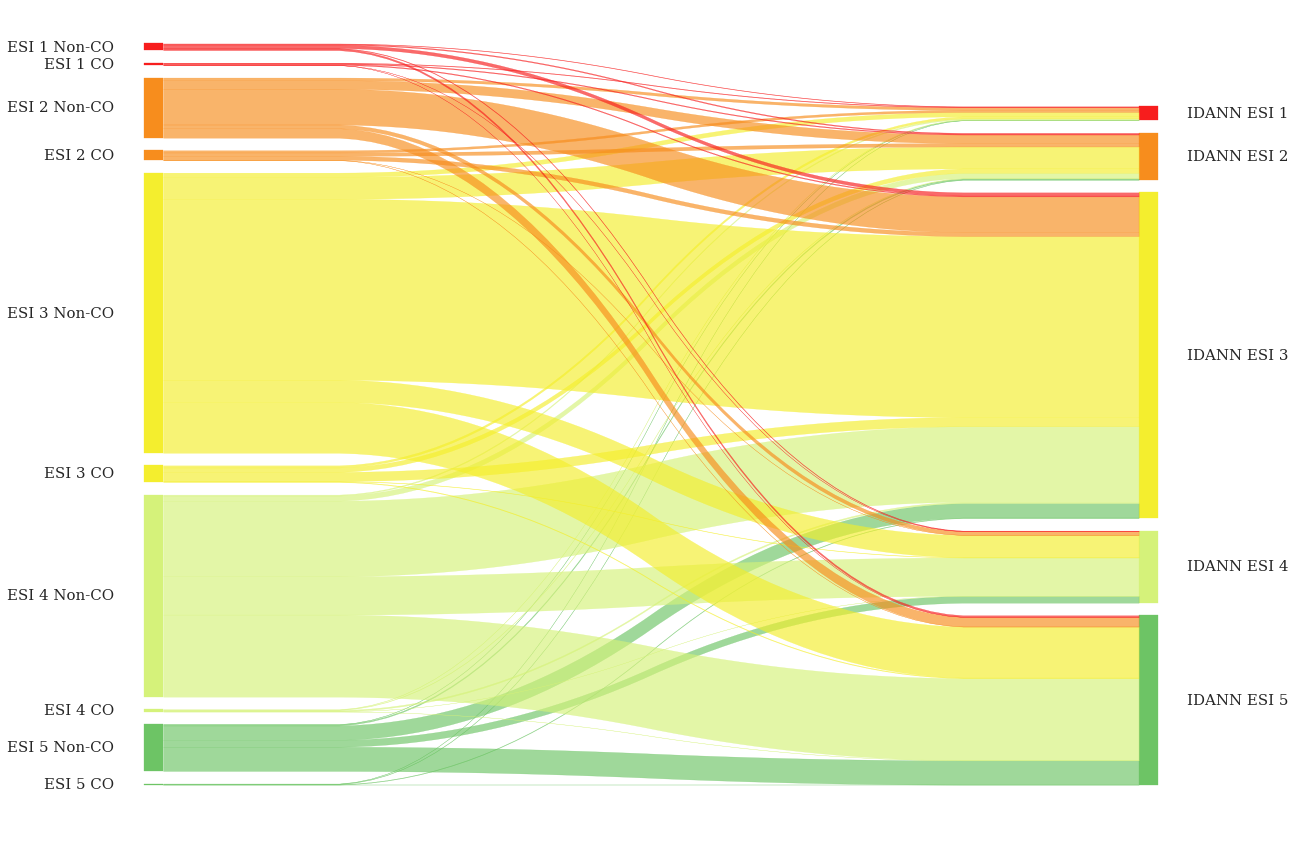

In [15]:
import sankey
import matplotlib.pyplot as plt
%matplotlib inline

colorDict =  {'ESI 1 CO':'#f71b1b',
              'ESI 1 Non-CO':'#f71b1b',
              'IDANN ESI 1':'#f71b1b',
              'ESI 2 CO':'#f78c1b',
              'ESI 2 Non-CO':'#f78c1b',
              'IDANN ESI 2':'#f78c1b',
              'ESI 3 CO':'#f4ee2c',
              'ESI 3 Non-CO':'#f4ee2c',
              'IDANN ESI 3':'#f4ee2c',
              'ESI 4 CO':'#d5f279',
              'ESI 4 Non-CO':'#d5f279',
              'IDANN ESI 4':'#d5f279',
              'ESI 5 CO':'#6cc464',
              'ESI 5 Non-CO':'#6cc464',
              'IDANN ESI 5':'#6cc464'}

left_side = ['ESI 5 CO', 'ESI 5 Non-CO', 'ESI 4 CO', 'ESI 4 Non-CO', 'ESI 3 CO', 'ESI 3 Non-CO', 'ESI 2 CO', 'ESI 2 Non-CO', 'ESI 1 CO', 'ESI 1 Non-CO'] 
right_side = ['IDANN ESI 5', 'IDANN ESI 4','IDANN ESI 3', 'IDANN ESI 2', 'IDANN ESI 1'] 

sankey.sankey(esi_co_flag,new_esi_string,aspect=10,colorDict=colorDict,fontsize=15,leftLabels=left_side, rightLabels=right_side)
plt.gcf().set_size_inches(20, 15)

print ("Previous ESI to New ESI")
unique, counts = np.unique(esi_co_flag, return_counts=True)
print (dict(zip(unique, counts)))
unique, counts = np.unique(new_esi_string, return_counts=True)
print (dict(zip(unique, counts)))

plt.savefig('sankey_with_critical_outcomes.png')

Previous ESI to New ESI
{'ESI 1 CO': 88, 'ESI 2 CO': 378, 'ESI 3 CO': 642, 'ESI 4 CO': 90, 'ESI 2 Non-CO': 2317, 'ESI 5 Non-CO': 1803, 'ESI 1 Non-CO': 257, 'ESI 3 Non-CO': 10790, 'ESI 5 CO': 47, 'ESI 4 Non-CO': 7783}
{'IDANN ESI 4': 2777, 'IDANN ESI 5': 6527, 'IDANN ESI 2': 1810, 'IDANN ESI 3': 12543, 'IDANN ESI 1': 538}


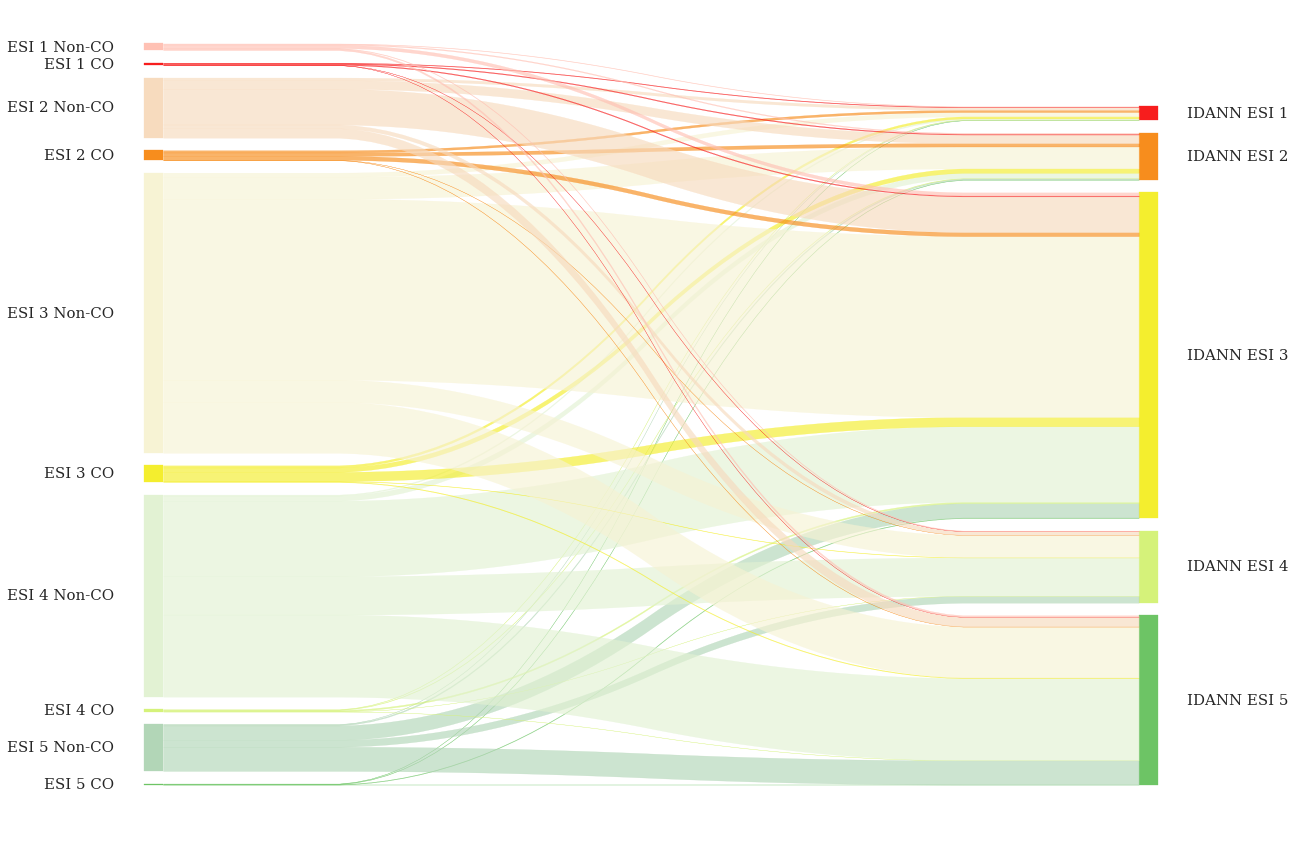

In [16]:
import sankey
import matplotlib.pyplot as plt
%matplotlib inline

colorDict =  {'ESI 1 CO':'#f71b1b',
              'ESI 1 Non-CO':'#ffc1b4',
              'IDANN ESI 1':'#f71b1b',
              'ESI 2 CO':'#f78c1b',
              'ESI 2 Non-CO':'#f7dbbe',
              'IDANN ESI 2':'#f78c1b',
              'ESI 3 CO':'#f4ee2c',
              'ESI 3 Non-CO':'#f7f3d4',
              'IDANN ESI 3':'#f4ee2c',
              'ESI 4 CO':'#d5f279',
              'ESI 4 Non-CO':'#e2f2d3',
              'IDANN ESI 4':'#d5f279',
              'ESI 5 CO':'#6cc464',
              'ESI 5 Non-CO':'#b2d6b7',
              'IDANN ESI 5':'#6cc464'}

left_side = ['ESI 5 CO', 'ESI 5 Non-CO', 'ESI 4 CO', 'ESI 4 Non-CO', 'ESI 3 CO', 'ESI 3 Non-CO', 'ESI 2 CO', 'ESI 2 Non-CO', 'ESI 1 CO', 'ESI 1 Non-CO'] 
right_side = ['IDANN ESI 5', 'IDANN ESI 4','IDANN ESI 3', 'IDANN ESI 2', 'IDANN ESI 1'] 

sankey.sankey(esi_co_flag,new_esi_string,aspect=10,colorDict=colorDict,fontsize=15,leftLabels=left_side, rightLabels=right_side)
plt.gcf().set_size_inches(20, 15)

print ("Previous ESI to New ESI")
unique, counts = np.unique(esi_co_flag, return_counts=True)
print (dict(zip(unique, counts)))
unique, counts = np.unique(new_esi_string, return_counts=True)
print (dict(zip(unique, counts)))

plt.savefig('sankey_with_critical_outcomes_light.png')

Previous ESI to New ESI
{'ESI 1 CO': 88, 'ESI 2 CO': 378, 'ESI 3 CO': 642, 'ESI 4 CO': 90, 'ESI 2 Non-CO': 2317, 'ESI 5 Non-CO': 1803, 'ESI 1 Non-CO': 257, 'ESI 3 Non-CO': 10790, 'ESI 5 CO': 47, 'ESI 4 Non-CO': 7783}
{'IDANN ESI 4': 2777, 'IDANN ESI 5': 6527, 'IDANN ESI 2': 1810, 'IDANN ESI 3': 12543, 'IDANN ESI 1': 538}


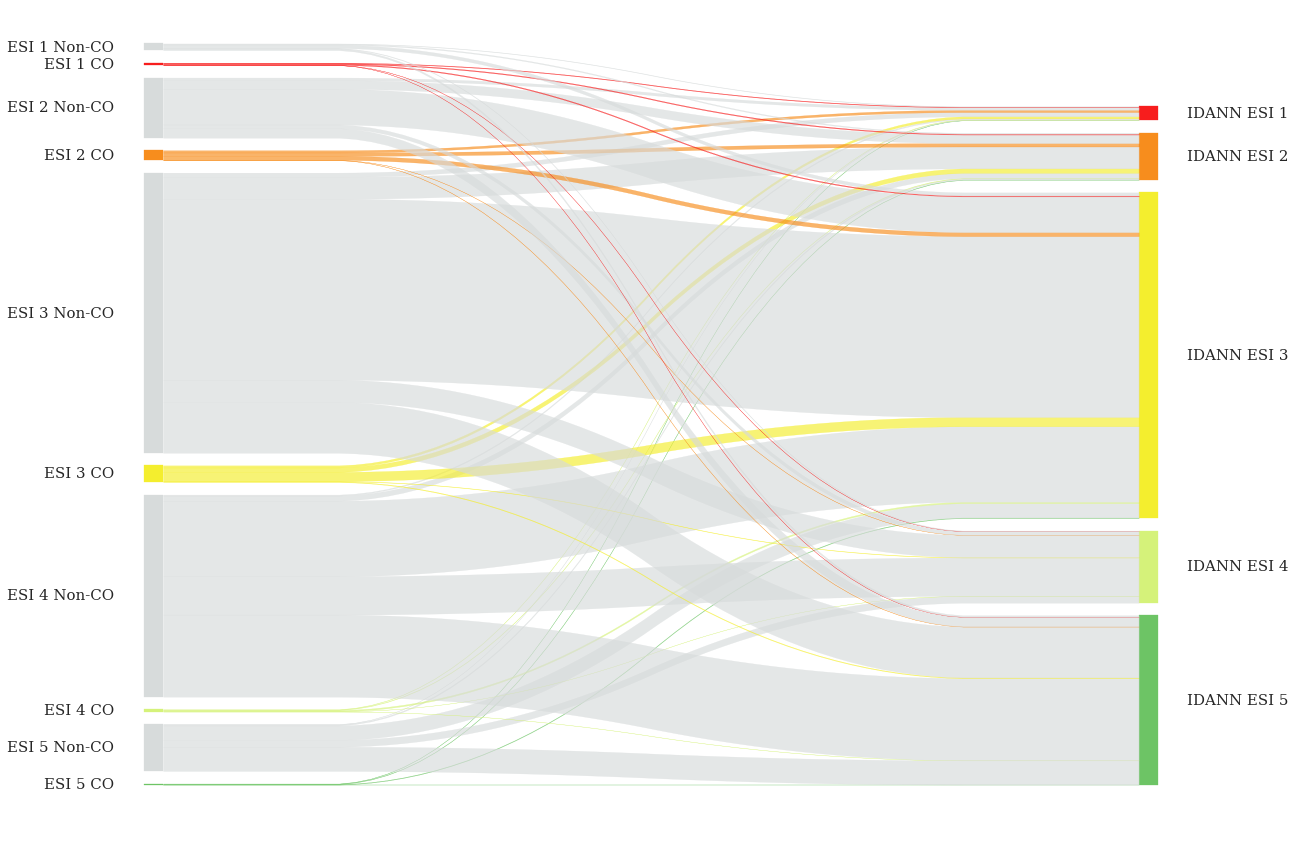

In [17]:
import sankey
import matplotlib.pyplot as plt
%matplotlib inline

colorDict =  {'ESI 1 CO':'#f71b1b',
              'ESI 1 Non-CO':'#d7dbdb',
              'IDANN ESI 1':'#f71b1b',
              'ESI 2 CO':'#f78c1b',
              'ESI 2 Non-CO':'#d7dbdb',
              'IDANN ESI 2':'#f78c1b',
              'ESI 3 CO':'#f4ee2c',
              'ESI 3 Non-CO':'#d7dbdb',
              'IDANN ESI 3':'#f4ee2c',
              'ESI 4 CO':'#d5f279',
              'ESI 4 Non-CO':'#d7dbdb',
              'IDANN ESI 4':'#d5f279',
              'ESI 5 CO':'#6cc464',
              'ESI 5 Non-CO':'#d7dbdb',
              'IDANN ESI 5':'#6cc464'}

left_side = ['ESI 5 CO', 'ESI 5 Non-CO', 'ESI 4 CO', 'ESI 4 Non-CO', 'ESI 3 CO', 'ESI 3 Non-CO', 'ESI 2 CO', 'ESI 2 Non-CO', 'ESI 1 CO', 'ESI 1 Non-CO'] 
right_side = ['IDANN ESI 5', 'IDANN ESI 4','IDANN ESI 3', 'IDANN ESI 2', 'IDANN ESI 1'] 

sankey.sankey(esi_co_flag,new_esi_string,aspect=10,colorDict=colorDict,fontsize=15,leftLabels=left_side, rightLabels=right_side)
plt.gcf().set_size_inches(20, 15)

print ("Previous ESI to New ESI")
unique, counts = np.unique(esi_co_flag, return_counts=True)
print (dict(zip(unique, counts)))
unique, counts = np.unique(new_esi_string, return_counts=True)
print (dict(zip(unique, counts)))

plt.savefig('sankey_with_critical_outcomes_grey.png')

## Additions for capstone showcase

#### Extra light Sankey plot

Previous ESI to New ESI
{'ESI 1 CO': 88, 'ESI 2 CO': 378, 'ESI 3 CO': 642, 'ESI 4 CO': 90, 'ESI 2 Non-CO': 2317, 'ESI 5 Non-CO': 1803, 'ESI 1 Non-CO': 257, 'ESI 3 Non-CO': 10790, 'ESI 5 CO': 47, 'ESI 4 Non-CO': 7783}
{'IDANN ESI 4': 2777, 'IDANN ESI 5': 6527, 'IDANN ESI 2': 1810, 'IDANN ESI 3': 12543, 'IDANN ESI 1': 538}


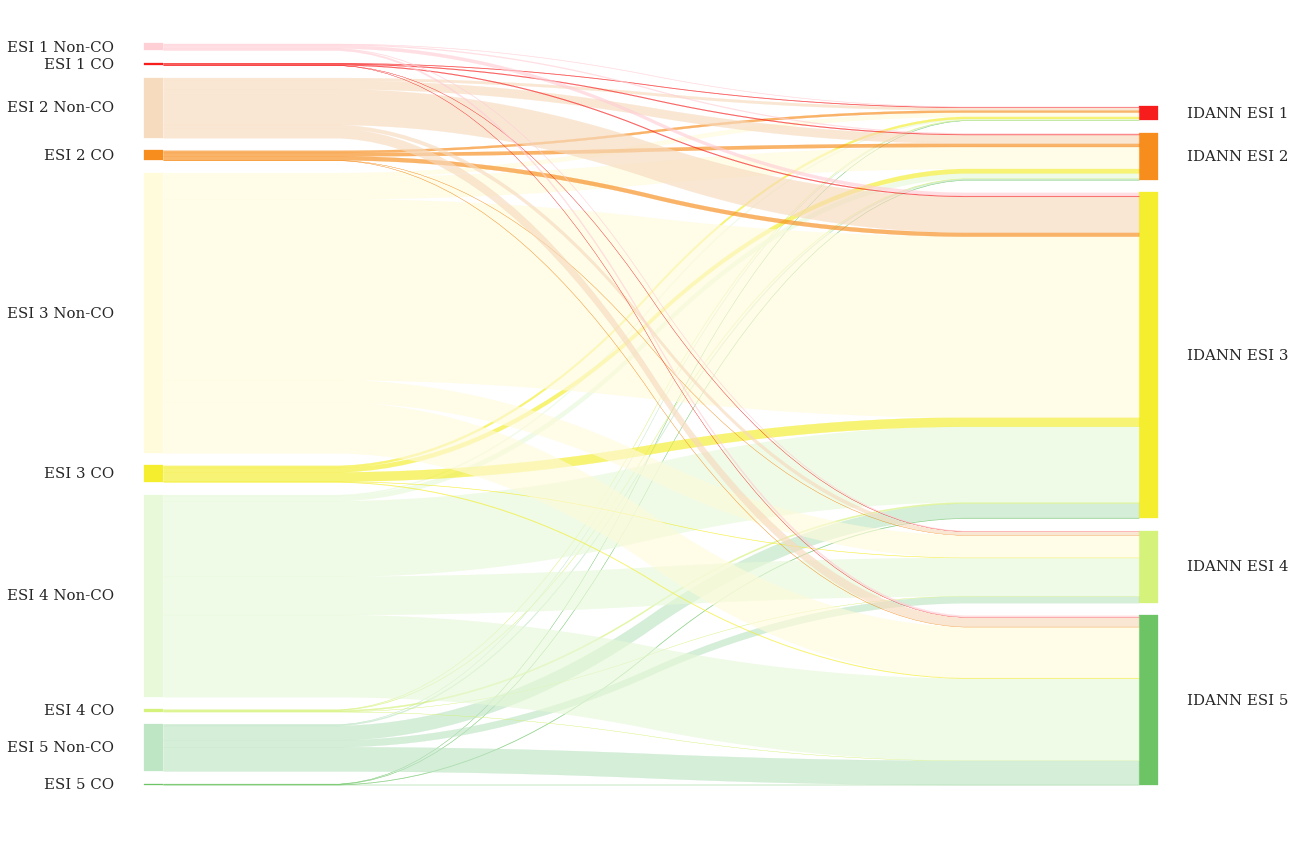

In [18]:
import sankey
import matplotlib.pyplot as plt
%matplotlib inline

colorDict =  {'ESI 1 CO':'#f71b1b',
              'ESI 1 Non-CO':'#ffcfd6',
              'IDANN ESI 1':'#f71b1b',
              'ESI 2 CO':'#f78c1b',
              'ESI 2 Non-CO':'#f7dbbe',
              'IDANN ESI 2':'#f78c1b',
              'ESI 3 CO':'#f4ee2c',
              'ESI 3 Non-CO':'#fffbdb',
              'IDANN ESI 3':'#f4ee2c',
              'ESI 4 CO':'#d5f279',
              'ESI 4 Non-CO':'#e7f9d9',
              'IDANN ESI 4':'#d5f279',
              'ESI 5 CO':'#6cc464',
              'ESI 5 Non-CO':'#bee5c4',
              'IDANN ESI 5':'#6cc464'}

left_side = ['ESI 5 CO', 'ESI 5 Non-CO', 'ESI 4 CO', 'ESI 4 Non-CO', 'ESI 3 CO', 'ESI 3 Non-CO', 'ESI 2 CO', 'ESI 2 Non-CO', 'ESI 1 CO', 'ESI 1 Non-CO'] 
right_side = ['IDANN ESI 5', 'IDANN ESI 4','IDANN ESI 3', 'IDANN ESI 2', 'IDANN ESI 1'] 

sankey.sankey(esi_co_flag,new_esi_string,aspect=10,colorDict=colorDict,fontsize=15,leftLabels=left_side, rightLabels=right_side)
plt.gcf().set_size_inches(20, 15)

print ("Previous ESI to New ESI")
unique, counts = np.unique(esi_co_flag, return_counts=True)
print (dict(zip(unique, counts)))
unique, counts = np.unique(new_esi_string, return_counts=True)
print (dict(zip(unique, counts)))

plt.savefig('sankey_with_critical_outcomes_extra_light.png')

### Split Sankey Plots

In [19]:
#Find indices for critical outcomes and non-CO

non_co_idx = [i for i, j in enumerate(esi_co_flag) if (j == 'ESI 1 Non-CO' or 
                                                       j == 'ESI 2 Non-CO' or j=='ESI 3 Non-CO' or 
                                                       j=='ESI 4 Non-CO' or j=='ESI 5 Non-CO')]



co_idx = [i for i, j in enumerate(esi_co_flag) if (j == 'ESI 1 CO' or 
                                                       j == 'ESI 2 CO' or j=='ESI 3 CO' or 
                                                       j=='ESI 4 CO' or j=='ESI 5 CO')]

#Create lists of non-CO old and new ESI

esi_nonco_flag =[]
new_esi_nonco_string=[]
for idx in non_co_idx:
    esi_nonco_flag.append(esi_co_flag[idx])
    new_esi_nonco_string.append(new_esi_string[idx])
    
    
#Create lists of CO-only old and new ESI

esi_only_co_flag = []
new_esi_only_co_string=[]
for ix in co_idx:
    esi_only_co_flag.append(esi_co_flag[ix])
    new_esi_only_co_string.append(new_esi_string[ix])

Critical Outcome Patients -- Previous ESI to New ESI
{'ESI 3 CO': 642, 'ESI 4 CO': 90, 'ESI 1 CO': 88, 'ESI 2 CO': 378, 'ESI 5 CO': 47}
{'IDANN ESI 4': 22, 'IDANN ESI 5': 41, 'IDANN ESI 2': 363, 'IDANN ESI 3': 610, 'IDANN ESI 1': 209}


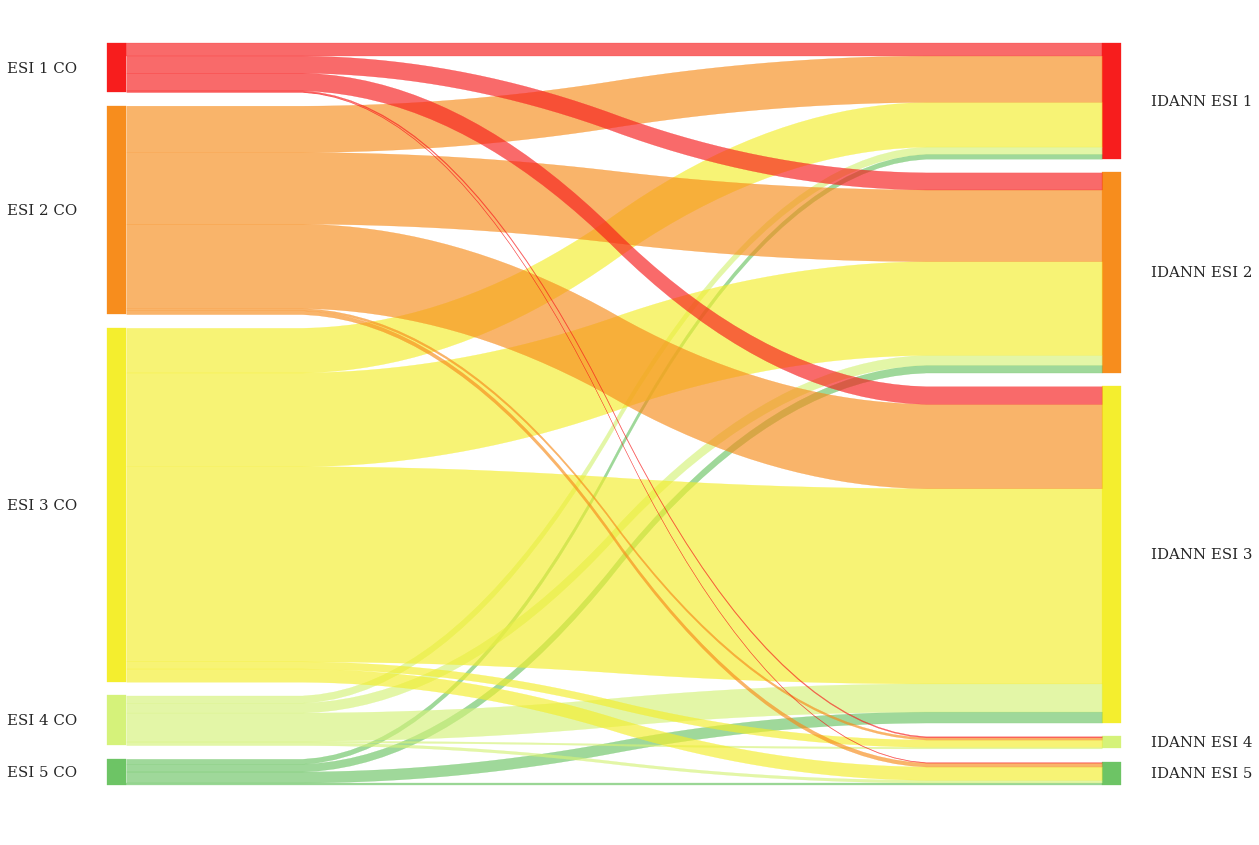

In [20]:
#CRITICAL OUTCOMES ONLY

import sankey
import matplotlib.pyplot as plt
%matplotlib inline

colorDict =  {'ESI 1 CO':'#f71b1b',
              'ESI 1 Non-CO':'#ffcfd6',
              'IDANN ESI 1':'#f71b1b',
              'ESI 2 CO':'#f78c1b',
              'ESI 2 Non-CO':'#f7dbbe',
              'IDANN ESI 2':'#f78c1b',
              'ESI 3 CO':'#f4ee2c',
              'ESI 3 Non-CO':'#fffbdb',
              'IDANN ESI 3':'#f4ee2c',
              'ESI 4 CO':'#d5f279',
              'ESI 4 Non-CO':'#e7f9d9',
              'IDANN ESI 4':'#d5f279',
              'ESI 5 CO':'#6cc464',
              'ESI 5 Non-CO':'#bee5c4',
              'IDANN ESI 5':'#6cc464'}

left_side = ['ESI 5 CO', 'ESI 4 CO', 'ESI 3 CO', 'ESI 2 CO', 'ESI 1 CO'] 
right_side = ['IDANN ESI 5', 'IDANN ESI 4','IDANN ESI 3', 'IDANN ESI 2', 'IDANN ESI 1'] 

sankey.sankey(esi_only_co_flag,new_esi_only_co_string,aspect=10,colorDict=colorDict,fontsize=15,leftLabels=left_side, rightLabels=right_side)
plt.gcf().set_size_inches(20, 15)

print ("Critical Outcome Patients -- Previous ESI to New ESI")
unique, counts = np.unique(esi_only_co_flag, return_counts=True)
print (dict(zip(unique, counts)))
unique, counts = np.unique(new_esi_only_co_string, return_counts=True)
print (dict(zip(unique, counts)))

plt.savefig('CO_ONLY_sankey_with_critical_outcomes_extra_light.png')

Non-Critical Patients -- Previous ESI to New ESI
{'ESI 5 Non-CO': 1803, 'ESI 1 Non-CO': 257, 'ESI 2 Non-CO': 2317, 'ESI 3 Non-CO': 10790, 'ESI 4 Non-CO': 7783}
{'IDANN ESI 4': 2755, 'IDANN ESI 5': 6486, 'IDANN ESI 2': 1447, 'IDANN ESI 3': 11933, 'IDANN ESI 1': 329}


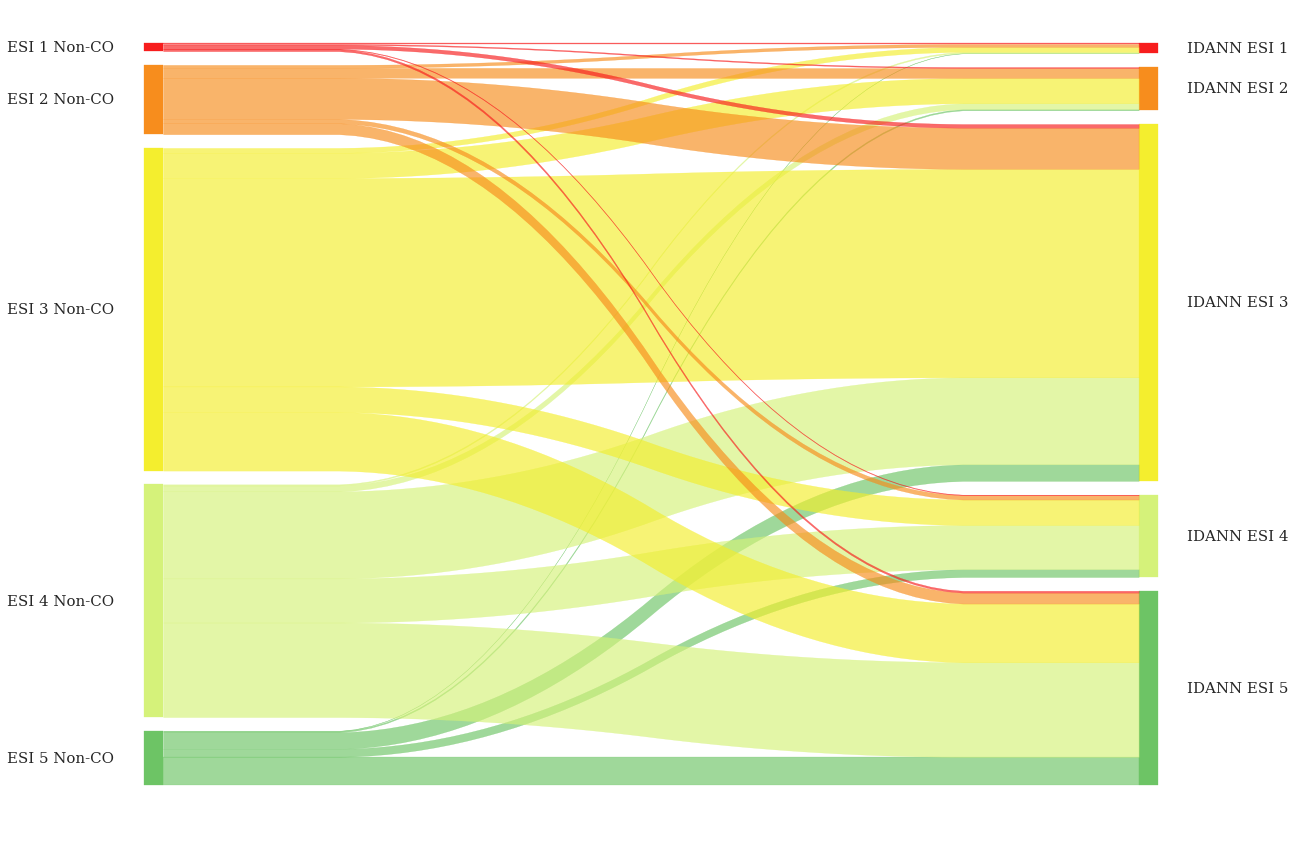

In [21]:
#NON CO ONLY

import sankey
import matplotlib.pyplot as plt
%matplotlib inline

colorDict =  {'ESI 1 CO':'#f71b1b',
              'ESI 1 Non-CO':'#f71b1b',
              'IDANN ESI 1':'#f71b1b',
              'ESI 2 CO':'#f78c1b',
              'ESI 2 Non-CO':'#f78c1b',
              'IDANN ESI 2':'#f78c1b',
              'ESI 3 CO':'#f4ee2c',
              'ESI 3 Non-CO':'#f4ee2c',
              'IDANN ESI 3':'#f4ee2c',
              'ESI 4 CO':'#d5f279',
              'ESI 4 Non-CO':'#d5f279',
              'IDANN ESI 4':'#d5f279',
              'ESI 5 CO':'#6cc464',
              'ESI 5 Non-CO':'#6cc464',
              'IDANN ESI 5':'#6cc464'}

left_side = ['ESI 5 Non-CO', 'ESI 4 Non-CO', 'ESI 3 Non-CO', 'ESI 2 Non-CO', 'ESI 1 Non-CO'] 
right_side = ['IDANN ESI 5', 'IDANN ESI 4','IDANN ESI 3', 'IDANN ESI 2', 'IDANN ESI 1'] 

sankey.sankey(esi_nonco_flag,new_esi_nonco_string,aspect=10,colorDict=colorDict,fontsize=15,leftLabels=left_side, rightLabels=right_side)
plt.gcf().set_size_inches(20, 15)

print ("Non-Critical Patients -- Previous ESI to New ESI")
unique, counts = np.unique(esi_nonco_flag, return_counts=True)
print (dict(zip(unique, counts)))
unique, counts = np.unique(new_esi_nonco_string, return_counts=True)
print (dict(zip(unique, counts)))

plt.savefig('NON_CO_ONLY_sankey_with_critical_outcomes_extra_light.png')